In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
import sys
import matplotlib as mpl

#insert path
sys.path.insert(0, '../methods/')

sys.modules.pop('generate_syn_data', None)
from generate_syn_data import *

sys.modules.pop('ARWQE', None)
from ARWQE import *

sys.modules.pop('plots', None)
from plots import *

In [2]:
tasks = ['linreg', 'mean']
shifts = ['stationary', 'nonstationary']

fixed_windows = [1, 4, 16, 64, 256, 1024]
train_windows = [1, 64, 256, 1024] 
methods = methods = ['ARW'] + ['weighted'] + [f'Val_{k}' for k in fixed_windows]

alpha = 0.1

mean stationary


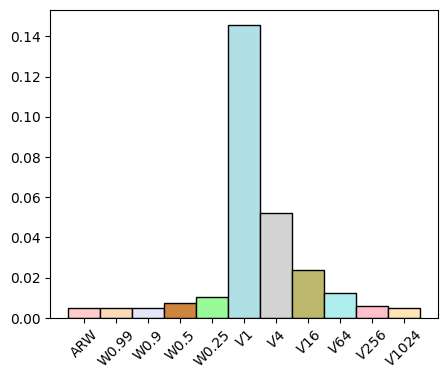

mean nonstationary


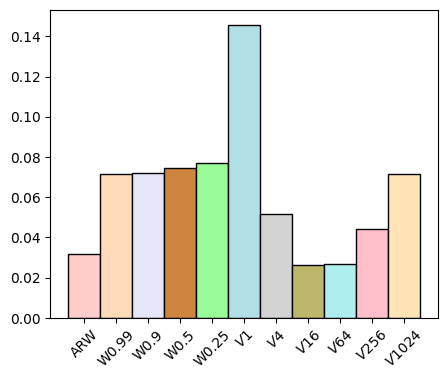

linreg stationary


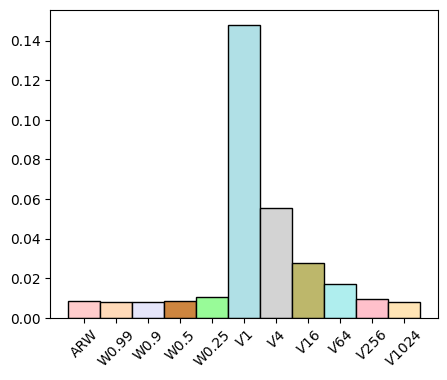

linreg nonstationary


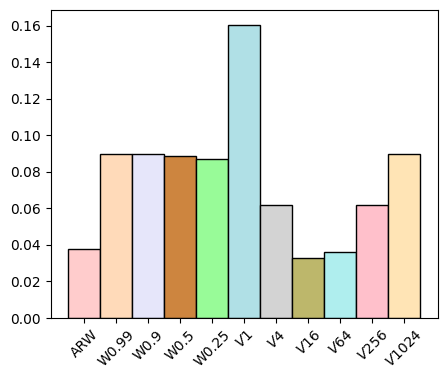

In [4]:
tasks = ['mean', 'linreg']
shifts = ['stationary', 'nonstationary']
rhos = [0.99, 0.9, 0.5, 0.25]
fixed_windows = [1, 4, 16, 64, 256, 1024]
train_windows = [1, 64, 256, 1024] 
methods = ['ARW'] + [rf'W{rho}' for rho in rhos] + [rf'$V{k}$' for k in fixed_windows]

alpha = 0.1

colors = ['#FFCCCC', '#FFDAB9', '#E6E6FA', '#CD853F', '#98FB98', '#B0E0E6', '#D3D3D3', '#BDB76B', '#AFEEEE', '#FFC0CB', '#FFE4B5']

result_dir = './results/' #NOTE: change this to your own result directory

for task in tasks:
    for shift in shifts:
        print(task, shift)
        cdf_array = np.load(f'{result_dir}{task}_{shift}_cdf_array_rhos.npy')
        mae_array = np.abs(cdf_array - 1 + alpha)
        num_trials = mae_array.shape[0]

        for m in range(0,1): #plot for training window = 1

            mae = np.mean(np.mean(mae_array[:, :, m, 100:], axis=2), axis=0)
            se_ae = np.std(np.mean(mae_array[:, :, m, 100:], axis=2), axis=0) / np.sqrt(num_trials) 

            plt.figure(figsize=(5,4))
            plt.bar(methods, mae, color=colors, edgecolor='black', width=1)
            plt.xticks(rotation=45)
            plt.show()

            #uncomment to save figure
            #plt.savefig(f'./figures/{task}_{shift}.pdf', bbox_inches='tight')